# Question 1:
1. Use User Data set and show the accuracy through the SVM model.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.getcwd()

'C:\\Users\\Dhruvraj\\Desktop\\LETS UPGRADE\\LetsUpgrade AI ML\\Assignments'

In [3]:
os.chdir('C:\\Users\\Dhruvraj\\Desktop\\LETS UPGRADE\\LetsUpgrade AI ML\\csv')

In [4]:
raw_data = pd.read_csv('salary.csv')
raw_data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
raw_data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [7]:
raw_data.isnull().any()

User ID            False
Gender             False
Age                False
EstimatedSalary    False
Purchased          False
dtype: bool

In [8]:
X = raw_data.drop(columns=['User ID','Purchased'], axis = 1).values
y = raw_data['Purchased'].values


In [9]:
X.shape

(400, 3)

In [10]:
y.shape

(400,)

<Figure size 864x576 with 0 Axes>

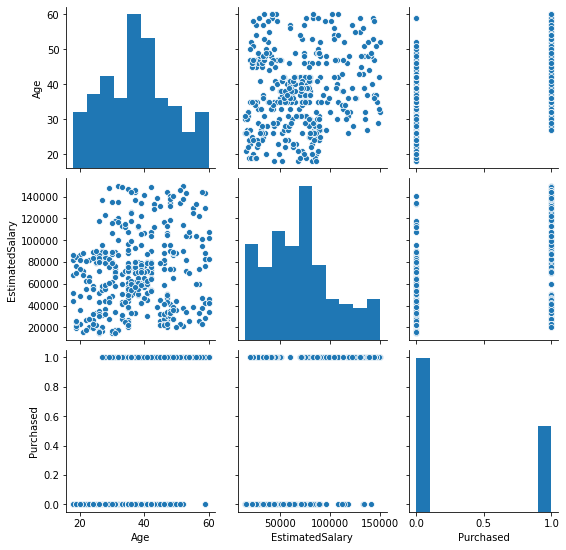

In [11]:
plt.figure(figsize=(12,8))
sns.pairplot(data=raw_data.drop(columns=['User ID'], axis = 1))

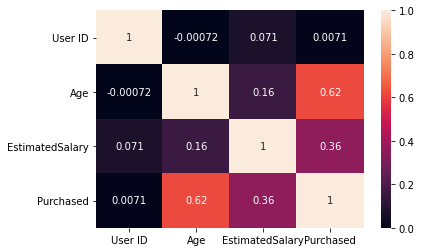

In [12]:
sns.heatmap(raw_data.corr(),annot=True, vmin=0, vmax=1, annot_kws={'size':10})

In [13]:
raw_data['Male'] = raw_data['Gender'].map( {'Male':1, 'Female':0} )

In [14]:
raw_data

,User ID,Gender,Age,EstimatedSalary,Purchased,Male
0,15624510,Male,19,19000,0,1
1,15810944,Male,35,20000,0,1
2,15668575,Female,26,43000,0,0
3,15603246,Female,27,57000,0,0
4,15804002,Male,19,76000,0,1
...,...,...,...,...,...,...
395,15691863,Female,46,41000,1,0
396,15706071,Male,51,23000,1,1
397,15654296,Female,50,20000,1,0
398,15755018,Male,36,33000,0,1


In [15]:
X= raw_data.drop(['User ID','Purchased','Gender'],axis=1).values
y= raw_data['Purchased'].values
print(X)

[[   19 19000     1]
 [   35 20000     1]
 [   26 43000     0]
 ...
 [   50 20000     0]
 [   36 33000     1]
 [   49 36000     0]]


In [16]:
print(y)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1
 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 1
 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 0
 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0
 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1
 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1]


In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [19]:
from sklearn.svm import SVC
svc= SVC(kernel='rbf',probability=True)
svc.fit(X_train,y_train)

SVC(probability=True)

In [20]:
pred_svc = svc.predict(X_test)

In [21]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,pred_svc))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94        63
           1       0.88      0.95      0.91        37

    accuracy                           0.93       100
   macro avg       0.92      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100



In [22]:
print(confusion_matrix(y_test,pred_svc))

[[58  5]
 [ 2 35]]


In [23]:
accuracy_score(y_test,pred_svc)


0.93

# =========ROC CURVE=================

In [24]:
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, auc,accuracy_score,confusion_matrix

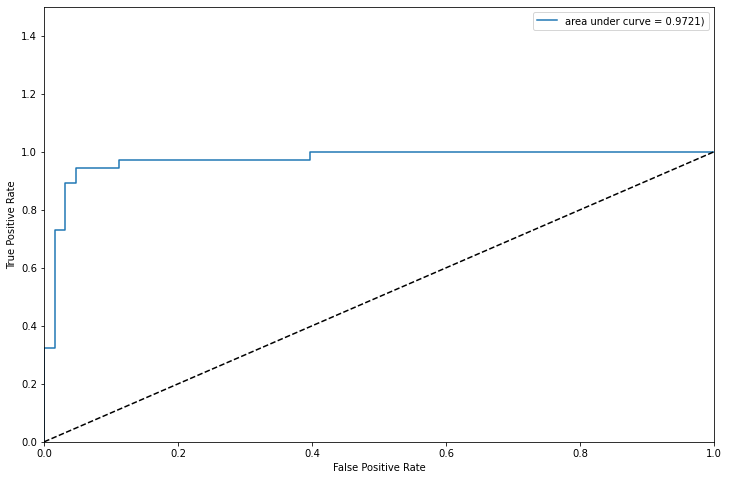

In [25]:
pred_svc = svc.predict(X_test)
y_pred = svc.predict_proba(X_test)[:,1]
fpr, tpr, th = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize = (12,8))

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.5])

plt.plot(fpr, tpr, label='area under curve = %0.4f)' % (roc_auc))
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
